# Accuracy Metrics

## Regression
* **Mean Absolute Percentage Error (MAPE)**: MAPE is often used when you want a measure that is independent of the scale of your data. It expresses the error as a percentage of the actual values, making it easier to interpret and compare across different datasets or models, regardless of their units or scales.
  * The output can be arbitrarily high when y_true is small or when abs(y_true - y_pred) is large (which is common for most regression metrics).

$$
MAPE = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{Actual_i - Prediction_i}{Actual_i} \right| \times 100\%
$$


* **Modified MAPE (MMAPE) or Adjusted MAPE**: To address the issue of small actual values, a modified version of MAPE can be used where a small constant is added to the denominator to avoid extremely high percentage errors.

$$
\text{MMAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{A_i - P_i}{A_i + \epsilon} \right| \times 100\%
$$

* **Symmetric MAPE (SMAPE)**: This is an alternative to MAPE that equally penalizes overforecast and underforecast by modifying the denominator to be the average of the predicted and actual values, thus avoiding the issue when actual values are near zero.

$$
\text{SMAPE} = \frac{100\%}{n} \sum_{i=1}^{n} \frac{|A_i - P_i|}{(|A_i| + |P_i|) / 2}
$$

* **Weighted Average Percentage Error (WAPE)**: Errors are weighted by volume. Recommended over MAPE when the target can be low or has intermittent values. The problem of infinite error is removed since the summation of actual value in the denominator can never be zero.
$$
\text{WAPE} = \frac{\sum_{i=1}^{n} |A_i - P_i|}{\sum_{i=1}^{n} |A_i|} \times 100\%
$$

* **Weighted MAPE (WMAPE)**: Used in cases where we want errors to be weighted by a priority, weight $w$ at time $t$ $(w_t)$. For example, we could weight by day of week as assign a weight of 10 on Monday and 1 on the remaining days.
$$
\text{WMAPE} = \frac{\sum_{i=1}^{n} w_t|A_i - P_i|}{\sum_{i=1}^{n} w_t|A_i|} \times 100\%
$$

In [10]:
import numpy as np
import pandas as pd

df = pd.DataFrame({    
    'actual':       [0, 100, 200, 300, 400, 500],
    'predicted':    [1, 110, 210, 320, 380, 480]
})
df

,actual,predicted
0,0,1
1,100,110
2,200,210
3,300,320
4,400,380
5,500,480


In [11]:
mape = (np.abs(df['actual'] - df['predicted']) / df['actual']).replace([np.inf, -np.inf], np.nan).mean() * 100
modified_mape = (np.abs(df['actual'] - df['predicted']) / (df['actual'] + 1)).mean() * 100
smape = (2 * np.abs(df['actual'] - df['predicted']) / (np.abs(df['actual']) + np.abs(df['predicted']))).mean() * 100
wape = np.sum(np.abs(df['actual'] - df['predicted'])) / np.sum(df['actual']) * 100
wmape = np.sum((np.abs(df['actual'] - df['predicted']) / df['actual']) * df['actual']) / np.sum(df['actual']) * 100

print(f'MAPE: \t {mape:.04}')
print(f'MMAPE: \t {modified_mape:.04}')
print(f'SMAPE: \t {smape:.04}')
print(f'WAPE: \t {smape:.04}')
print(f'WMAPE: \t {wape:.04}')

MAPE: 	 6.133
MMAPE: 	 21.75
SMAPE: 	 38.34
WAPE: 	 38.34
WMAPE: 	 5.4


* **Mean Squared Error (MSE)**: Useful when large errors are particularly undesirable. Since it squares the errors before averaging them, larger errors have a disproportionately larger impact on the metric. 

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (A_i - P_i)^2
$$

* **Root Mean Squared Error (RMSE)**:
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (A_i - P_i)^2}
$$

* **Mean Absolute Error (MAE)**:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |A_i - P_i|
$$


In [8]:
df = pd.DataFrame({    
    'actual':       [0, 100, 200, 300, 400, 500],
    'predicted':    [1, 110, 210, 320, 380, 480]
})
display(df)

,actual,predicted
0,0,1
1,100,110
2,200,210
3,300,320
4,400,380
5,500,480


In [9]:
df['MSE'] = (df['actual'] - df['predicted']) ** 2
df['MAE'] = abs(df['actual'] - df['predicted'])

print("MSE:", df['MSE'].mean())
print(f"RMSE: {np.sqrt(df['MSE'].mean()):.2f}")
print("MAE:", df['MAE'].mean())

MSE: 233.5
RMSE: 15.28
MAE: 13.5


## Classification metrics


* **Accuracy**:
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

* **Precision**: “What proportion of positive identifications was actually correct?”
$$ \text{Precision} = \frac{TP}{TP + FP} $$

* **Sensitivity / Recall / True Positive Rate**: “Of all the actual positives, what proportion were correctly identified as positive?
$$ \text{Sensitivity} = \text{Recall} = \frac{TP}{TP + FN} $$

* **Specificity / True Negative Rate**: "Of all the actual negatives, how many were correctly identified as negative?"
$$ \text{Specificity} = \frac{TN}{TN + FP} $$

* **F1 Score**: the harmonic mean of precision and recall
$$ \text{F1 Score} = 2 \times \frac{Precision \times Recall}{Precision + Recall} $$

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def eval_classification_perf(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(4, 3))
    cax = ax.matshow(cm, cmap='Blues')
    plt.colorbar(cax)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels([0, 1])
    ax.set_yticklabels([0, 1])

    # Choose text color based on the background
    threshold = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = "white" if cm[i, j] > threshold else "black"
            ax.text(j, i, format(cm[i, j], 'd'), 
                    ha="center", va="center",
                    color=color)

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

Accuracy: 0.82
Precision: 0.67
Recall: 1.00
F1 Score: 0.80


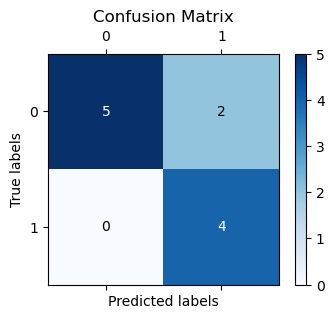

In [41]:
y_true = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
y_pred = [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]

eval_classification_perf(y_true, y_pred)

Accuracy: 0.82
Precision: 1.00
Recall: 0.67
F1 Score: 0.80


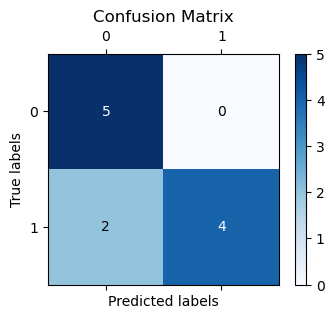

In [42]:
y_true = [1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
y_pred = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

eval_classification_perf(y_true, y_pred)

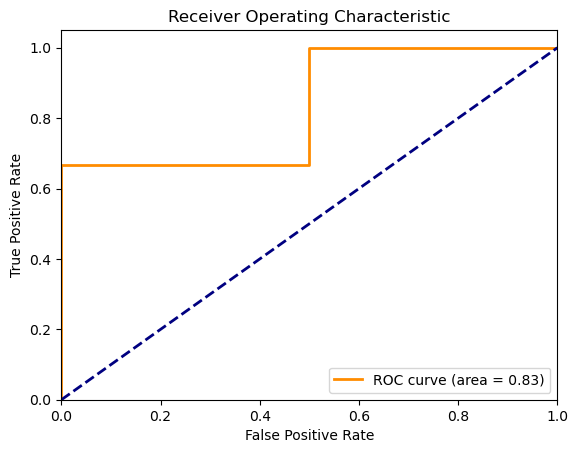

In [301]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, class_sep=.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for the classifier
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


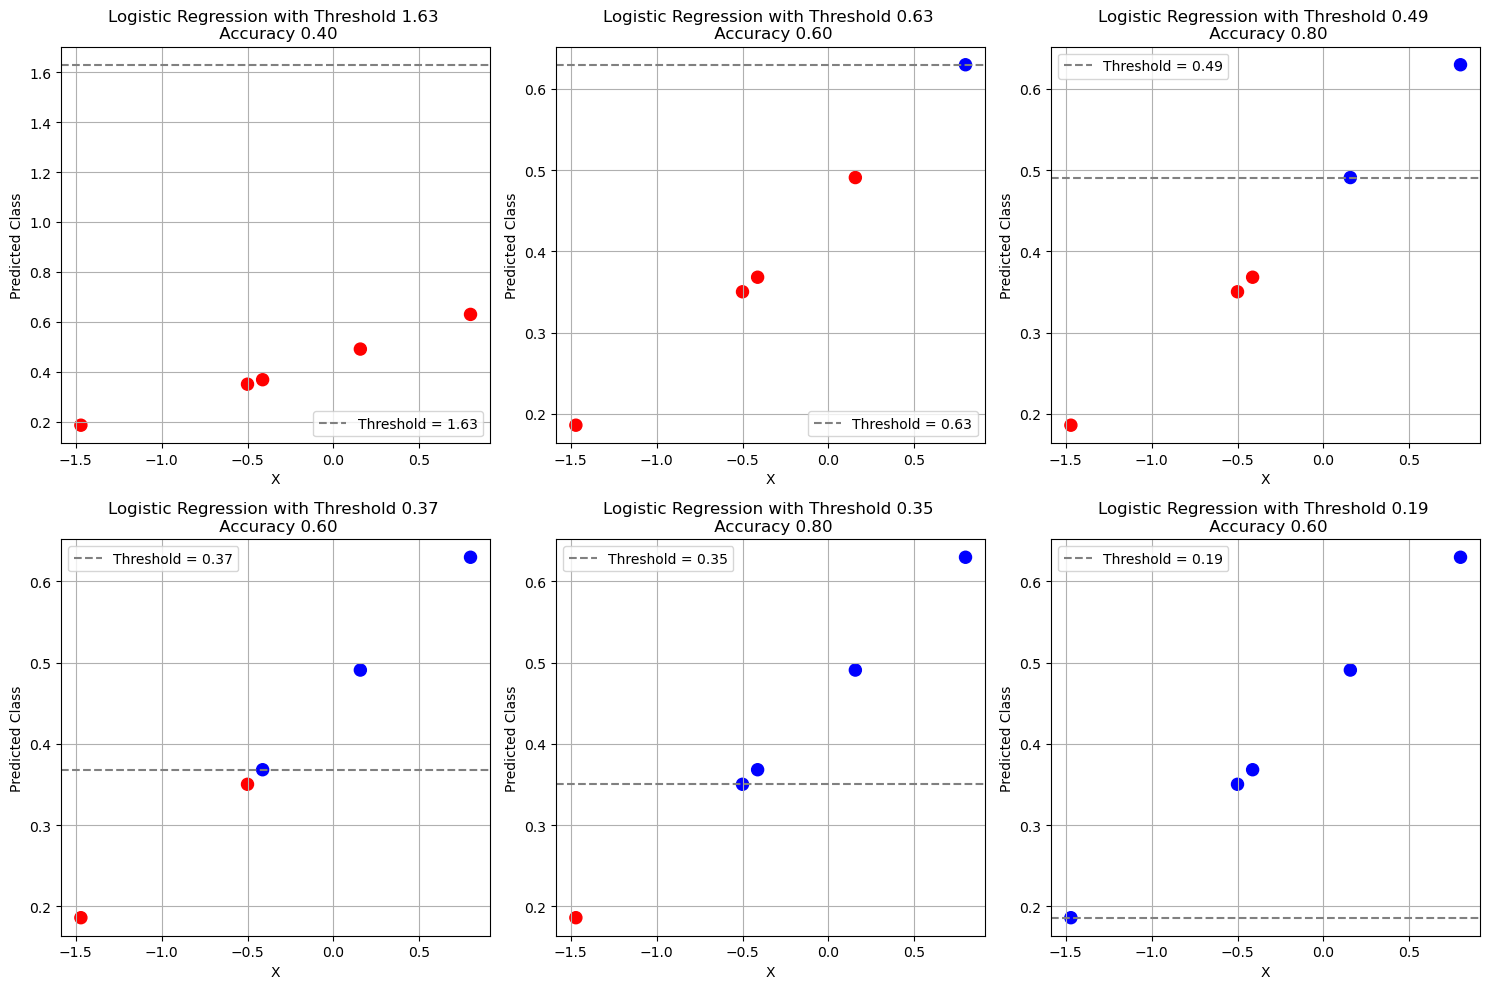

In [307]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) 
axes = axes.flatten()

for ax, threshold in zip(axes, thresholds):

    # Plot the threshold line
    ax.axhline(y=threshold, color='gray', linestyle='--', label=f'Threshold = {threshold:.2f}')
    
    # Scatter plot with predictions
    predictions = (clf.predict_proba(X_test)[:,1] >= threshold).astype(int)
    probabilities = clf.predict_proba(X_test)[:, 1]
    colors = ['red' if value < threshold else 'blue' for value in probabilities]
    # colors = ['red' if value == 0 else 'blue' for value in predictions]
    ax.scatter(X_test, probabilities, marker='.', c=colors, s=300)
    ax.grid(True)
    ax.set_xlabel('X')
    ax.set_ylabel('Predicted Class')
    ax.set_title(f'Logistic Regression with Threshold {threshold:.2f} \n Accuracy {accuracy_score(y_test, predictions):.2f}')
    ax.legend()

plt.tight_layout()
plt.show()


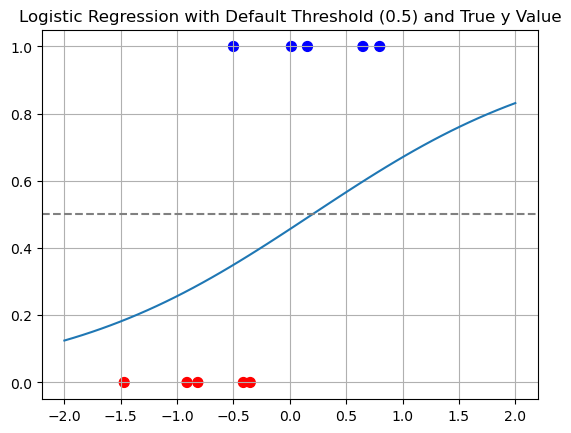

In [297]:
def f(x):
    return 1 / (1 + np.exp(-(clf.coef_ * x + clf.intercept_)))

line = np.linspace(-2, 2).reshape((-1,1))
# line = np.linspace(min(X), max(X)).reshape((-1,1))
plt.plot(line, f(line))
plt.axhline(y=0.5, color='gray', linestyle='--')
colors = ['red' if value == 0 else 'blue' for value in y]
plt.scatter(X, y, marker='.', c=colors, s=200)
plt.grid(True)
plt.title(f'Logistic Regression with Default Threshold (0.5) and True y Value')
plt.show()

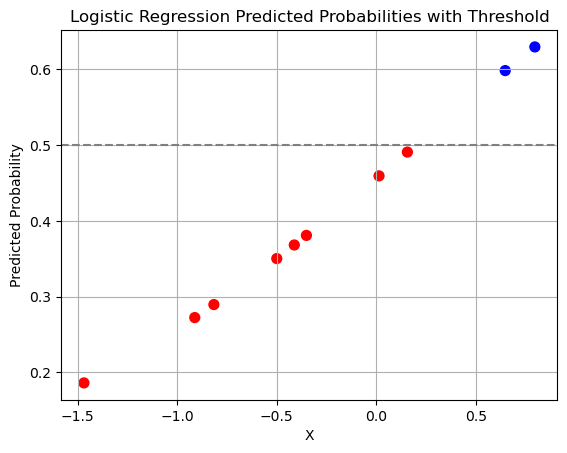

In [303]:
# This will give you the probabilities of the positive class
probabilities = clf.predict_proba(X)[:, 1]

colors = ['red' if value < 0.5 else 'blue' for value in probabilities]
plt.scatter(X, probabilities, marker='.', c=colors, s=200)

# Add a horizontal line at y=0.5 to represent the threshold
plt.axhline(y=0.5, color='gray', linestyle='--')

plt.grid(True)
plt.xlabel('X')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression Predicted Probabilities with Threshold')
plt.show()
